## HANYANG UNIVERSITY GRADUATE SCHOOL OF TECHNOLOGY & INNOVATION MANAGEMENT

## Python Programming

### 기말고사

**23학번 석사과정 이재원 (2023161840)**

# 데이터 불러오기 테스트

In [34]:
import pandas as pd

pd.set_option('display.max_rows', 50)
# ISBN 일반 문자열로 읽기
try:
    list_2020 = pd.read_csv('./2020_11.csv', dtype={'ISBN': str} , encoding='utf-8')
    list_2023 = pd.read_csv('./2023_11.csv', dtype={'ISBN': str}, encoding='utf-8')
except UnicodeDecodeError:
    list_2020 = pd.read_csv('./2020_11.csv', encoding='ISO-8859-1') 
    list_2023 = pd.read_csv('./2023_11.csv', encoding='ISO-8859-1') 


print(list_2020.columns.values)
print(list_2023.columns.values)

print(len(list_2020))
print(len(list_2023))

/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/1419513311.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  list_2020 = pd.read_csv('./2020_11.csv', dtype={'ISBN': str} , encoding='utf-8')


['번호' '도서명' '저자' '출판사' '발행년도' 'ISBN' '세트 ISBN' '부가기호' '권' '주제분류번호' '도서권수'
 '대출건수' '등록일자']
['번호' '도서명' '저자' '출판사' '발행년도' 'ISBN' '세트 ISBN' '부가기호' '권' '주제분류번호' '도서권수'
 '대출건수' '등록일자']
225449
228573


/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/1419513311.py:7: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  list_2023 = pd.read_csv('./2023_11.csv', dtype={'ISBN': str}, encoding='utf-8')


## 1. 2020년 11월과 비교하여 2023년 11월 시점에서 추가된 도서의 목록 및 개수

In [35]:

from IPython.display import display

# ISBN으로 먼저 중복 제거
list_2020 = list_2020.drop_duplicates(['ISBN'])
list_2023 = list_2023.drop_duplicates(['ISBN'])

# ISBN 기준으로 2023년도에 추가된 도서 목록 추출 
added_books = list_2023[~list_2023['ISBN'].isin(list_2020['ISBN'])]


print("2023년에 추가된 도서 목록:")
display(added_books[['도서명', '저자', 'ISBN']])  # 목록 출력
display("\n2023년에 추가된 도서 개수:", len(added_books))

2023년에 추가된 도서 목록:


,도서명,저자,ISBN
0,Hyperculture,Han Byung-Chul;Steuer Daniel,9781509546176
1,My Weird School Graphic Novel:Mr. Corbett Is i...,댄 거트먼,9780062947611
2,My Weird School Graphic Novel:Get a Grip! We'r...,Dan Gutman,9780063054486
3,Jennifer Chan Is Not Alone,Tae Keller,9780593567449
4,Pride and Prejudice,Jane Austen,9780143105428
...,...,...,...
66850,나이트 사파리에서 살아남기.,곰돌이 co. 글;한현동 그림,9788937839559
95620,(초등학생을 위한) 맨처음 과학,김태일 글;마정원 그림,9788965913214
102522,(네이티브처럼 말하게 해주는) 대박 영어회화표현 405,니키 지음,9791185980034
120069,살아있는 한국사 교과서,전국역사교사모임 지음,9788958620228


'\n2023년에 추가된 도서 개수:'

30450

## 2. 2020년 11월과 비교하여 2023년 11월 시점에서 없어진 도서의 목록 및 개수

In [36]:
# ISBN으로 먼저 중복 제거
list_2020 = list_2020.drop_duplicates(['ISBN'])
list_2023 = list_2023.drop_duplicates(['ISBN'])

# ISBN 기준으로 2023년도에 제거된 도서 목록 추출 
remove_books = list_2020[~list_2020['ISBN'].isin(list_2023['ISBN'])]


print("2023년에 제거된 도서 목록:")
display(remove_books[['도서명', '저자', 'ISBN']])  # 목록 출력
print("\n2023년에 제거된 도서 개수:", len(remove_books))

2023년에 제거된 도서 목록:


,도서명,저자,ISBN
175,Moon:night-time around the world,[text by Patricia Hegarty];illustrated by Brit...,9781848696679
225,(The) girl who fell from the sky,by Victoria Forester,9781250759634
232,Good enough to eat:a kid's guide to food and n...,Lizzy Rockwell,9780439819770
773,구슬비,권오순 시;이준섭 그림,9788982817496
874,(한눈에 펼쳐 보는) 공룡의 세계,레이첼 퍼스 글;사만다 바렛 그림;신인수 옮김,9791190183550
...,...,...,...
220344,악령,도스또옙스끼 지음;이철 옮김,9788908071513
220345,악령,도스또옙스끼 지음;이철 옮김,9788908071506
220356,나의 영어실력은?=Test your English,John G. Stevenson;Steven J. Rainey [공편저],9788917270709
220357,나의 이름은 멘추,엘리자베스 부르고스 著;유정태 옮김,9788976210029



2023년에 제거된 도서 개수: 25460


## 3. 2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 20권의 리스트와 그 빈도수 비교

In [37]:
# 같은 책이라도 여러 권이 각각 다른 대출건수를 기록하고 있음
# Q. 중복 제거하면서 대출건수를 합산하는게 맞을까?

# 중복제거 안한 데이터
list_2020 = pd.read_csv('./2020_11.csv', dtype={'ISBN': str} , encoding='utf-8')
list_2023 = pd.read_csv('./2023_11.csv', dtype={'ISBN': str}, encoding='utf-8')

# 2020년 11월과 2023년 11월의 대출건수가 가장 많은 상위 20권 도서 찾기
top20_2020 = list_2020.nlargest(20, '대출건수')
top20_2023 = list_2023.nlargest(20, '대출건수')

# 결과 출력
print("2020년 11월 대출이 가장 많았던 상위 20권 도서:")
display(top20_2020[['도서명','ISBN', '대출건수']])

print("\n2023년 11월 대출이 가장 많았던 상위 20권 도서:")
display(top20_2023[['도서명','ISBN', '대출건수']])

/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/743669378.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  list_2020 = pd.read_csv('./2020_11.csv', dtype={'ISBN': str} , encoding='utf-8')


2020년 11월 대출이 가장 많았던 상위 20권 도서:


/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/743669378.py:6: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  list_2023 = pd.read_csv('./2023_11.csv', dtype={'ISBN': str}, encoding='utf-8')


,도서명,ISBN,대출건수
216523,太白山脈,9788973370788,686
214615,칠판 앞에 나가기 싫어!,9788949160368,660
214374,짜장 짬뽕 탕수육,9788986565522,649
214770,세상에서 제일 힘센 수탉,9788986565041,590
219824,동물 농장,9788937460050,575
181589,그해 5월,9788935659432,547
218189,왜란종결자/,9788975270864,485
217188,모순,9788985577922,463
218651,화요일의 두꺼비,9788971964309,447
169115,내 이름은 나답게,9788971965887,439



2023년 11월 대출이 가장 많았던 상위 20권 도서:


,도서명,ISBN,대출건수
222083,칠판 앞에 나가기 싫어!,9788949160368,709
222194,세상에서 제일 힘센 수탉,9788986565041,590
225671,동물 농장,9788937460050,581
198827,그해 5월,9788935659432,551
223849,모순,9788985577922,497
224600,왜란종결자/,9788975270864,485
186624,화요일의 두꺼비,9788971965559,449
190013,내 이름은 나답게,9788971965887,446
224775,연어,9788985712682,414
225832,좀머 씨 이야기,9788932900209,414


## 4.2020년 11월과 2023년 11월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트와 그 개수

In [38]:
# 2020년 11월과 2023년 11월의 대출건수가 가장 많은 상위 100권 도서 찾기
top100_2020 = list_2020.nlargest(100, '대출건수')
top100_2023 = list_2023.nlargest(100, '대출건수')

# 두 목록에서 중복되는 ISBN 찾기
common_books = pd.merge(top100_2020, top100_2023, on='ISBN')

# 컬럼 이름 변경
common_books = common_books.rename(columns={'도서명_x': '도서명', 
                                            '대출건수_x': '대출건수_2020', 
                                            '대출건수_y': '대출건수_2023'})

print("2020년과 2023년에 모두 포함된 도서 목록:")
display(common_books[['도서명', 'ISBN', '대출건수_2020', '대출건수_2023']])  # 도서명과 ISBN, 각 연도별 대출건수 출력

print("\n2020년과 2023년에 모두 포함된 도서 개수:", len(common_books),"권")

2020년과 2023년에 모두 포함된 도서 목록:


,도서명,ISBN,대출건수_2020,대출건수_2023
0,칠판 앞에 나가기 싫어!,9788949160368,660,709
1,세상에서 제일 힘센 수탉,9788986565041,590,590
2,동물 농장,9788937460050,575,581
3,그해 5월,9788935659432,547,551
4,왜란종결자/,9788975270864,485,485
...,...,...,...,...
46,숲은 어떻게 만들어지는가?:,9788949160535,265,267
47,아주 오래된 농담:,9788939203976,264,280
48,(고우영)초한지,9788984477629,263,266
49,수영장 사건,9788949160078,262,300



2020년과 2023년에 모두 포함된 도서 개수: 51 권


## 5. 2020년 11월 가장 대출이 많이 발생한 도서 상위 50권의 당시 대출 횟수와 현재 대출 횟수 비교하여 증가한 도서와 감소한 도서 파악, 그래프로 표현

/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/800791791.py:6: DtypeWarning: Columns (5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  list_2020 = pd.read_csv('2020_11.csv')
/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/800791791.py:7: DtypeWarning: Columns (5,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  list_2023 = pd.read_csv('2023_11.csv')


,도서명_2020,대출건수 변화
0,칠판 앞에 나가기 싫어!,-605
1,칠판 앞에 나가기 싫어!,-573
2,짜장 짬뽕 탕수육,-594
3,짜장 짬뽕 탕수육,-524
4,세상에서 제일 힘센 수탉,-569
5,세상에서 제일 힘센 수탉,-565
6,세상에서 제일 힘센 수탉,-541
7,동물 농장,-518
8,그해 5월,-515
9,그해 5월,-513


/Users/eden/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


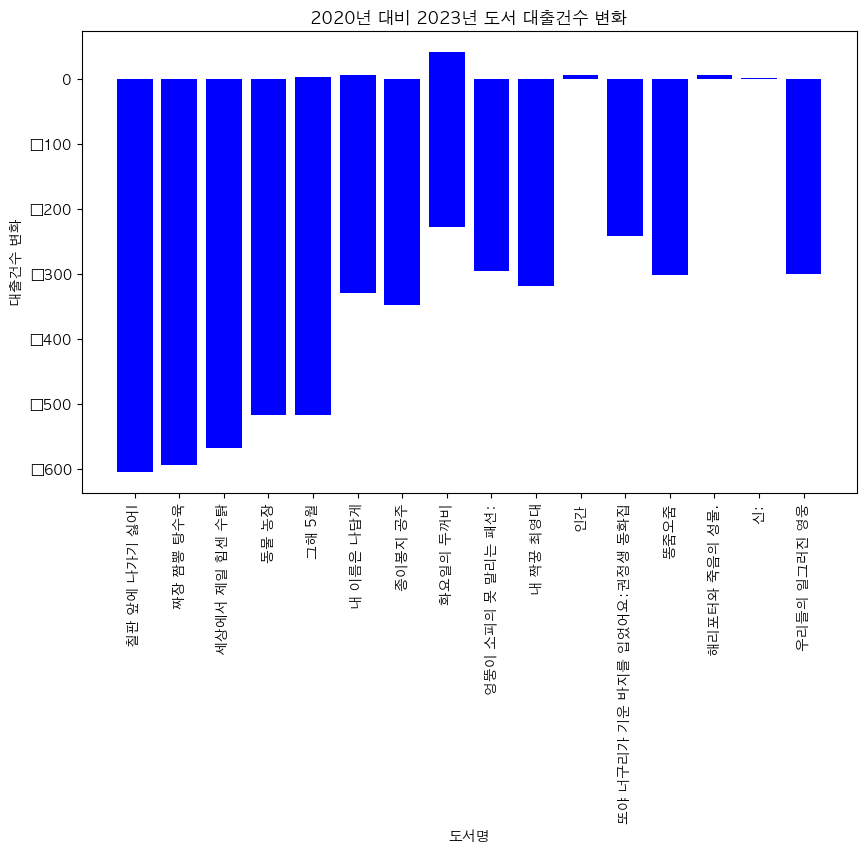

In [39]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic' 

list_2020 = pd.read_csv('2020_11.csv')
list_2023 = pd.read_csv('2023_11.csv')


# 2020년의 대출건수가 가장 많은 상위 50권 도서 찾기
top50_2020 = list_2020.nlargest(50, '대출건수')

# 2020년과 2023년 데이터 병합
merged_books = pd.merge(top50_2020, list_2023, on='ISBN', suffixes=('_2020', '_2023'))


# 대출건수 증가/감소 파악
merged_books['대출건수 변화'] = merged_books['대출건수_2023'] - merged_books['대출건수_2020']
display(merged_books[['도서명_2020', '대출건수 변화']])

# 그래프로 표현
plt.figure(figsize=(10,6))
plt.bar(merged_books['도서명_2020'], merged_books['대출건수 변화'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('도서명')
plt.ylabel('대출건수 변화')
plt.title('2020년 대비 2023년 도서 대출건수 변화')
plt.show()

## 6. 위의 통계를 도출하면서 필요한 전처리 (중복 제거, 누락값 처리, 잘못된 값 처리 등)를 강의 내용을 참고하여 수행

,도서명_2020,대출건수_2020,대출건수_2023
0,비뢰도:,2145,256
1,비뢰도:,2145,739
2,비뢰도=飛雷刀,1756,1327
3,어린이 과학 형사대 CSI,1406,480
4,아린이야기=Arin's story:,1170,1174
5,맛있는 과학,1062,1231
6,(제로니모의)환상모험 Plus,981,784
7,드래곤 라자=Dragon raja,877,903
8,20세기 한국소설,863,837
9,20세기 한국소설,863,29


/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/948982270.py:40: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/Users/eden/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


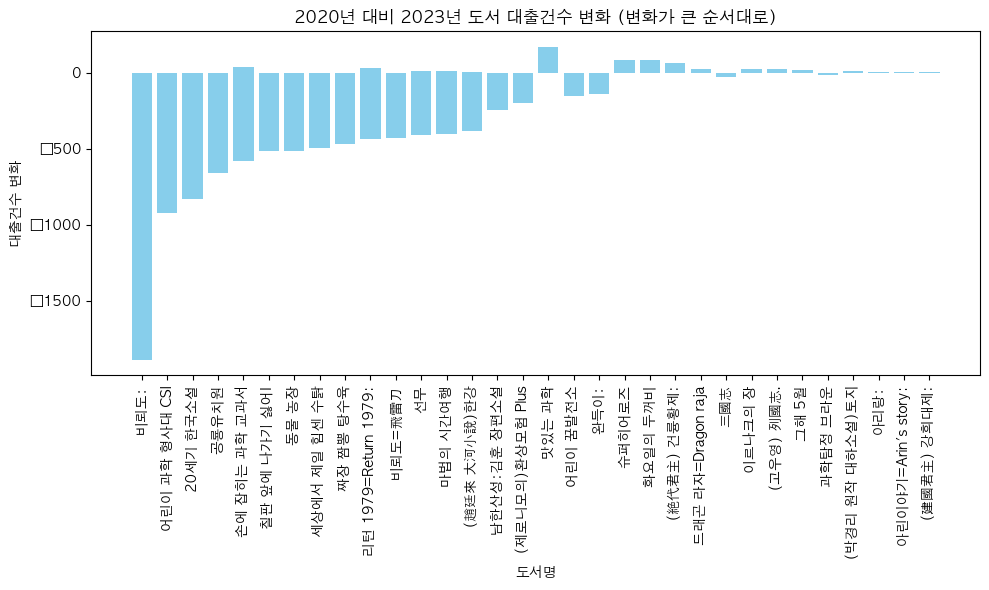

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic' 


# '대출건수' 컬럼이 문자열로 인식될 경우 숫자형으로 변환
list_2020['대출건수'] = pd.to_numeric(list_2020['대출건수'], errors='coerce')
list_2023['대출건수'] = pd.to_numeric(list_2023['대출건수'], errors='coerce')


# ISBN을 기준으로 중복값 제거, 대출건수 합산, 도서명을 유지
grouped_2020 = list_2020.groupby(['ISBN', '도서명'])['대출건수'].sum().reset_index()
grouped_2023 = list_2023.groupby(['ISBN', '도서명'])['대출건수'].sum().reset_index()

# 2020년의 대출건수가 가장 많은 상위 50권 도서 찾기
top50_2020 = grouped_2020.nlargest(50, '대출건수')


# 2020년과 2023년 데이터 병합
merged_books = pd.merge(top50_2020, grouped_2023, on='ISBN', suffixes=('_2020', '_2023'))

display(merged_books[['도서명_2020', '대출건수_2020', '대출건수_2023']])

# 대출건수 증가/감소 파악
merged_books['대출건수 변화'] = merged_books['대출건수_2023'] - merged_books['대출건수_2020']

# '대출건수 변화'의 절대값을 기준으로 데이터 정렬
merged_books['대출건수 변화 절대값'] = merged_books['대출건수 변화'].abs()
merged_books_sorted = merged_books.sort_values(by='대출건수 변화 절대값', ascending=False)

# 그래프로 표현
plt.figure(figsize=(10,6))
plt.bar(merged_books_sorted['도서명_2020'], merged_books_sorted['대출건수 변화'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('도서명')
plt.ylabel('대출건수 변화')
plt.title('2020년 대비 2023년 도서 대출건수 변화 (변화가 큰 순서대로)')
plt.tight_layout()
plt.show()


## 7. 위의 통계 외에도 2020년과 2023년을 비교하기에 유의미하다고 여겨지는 분석을 각자 수행하고 그 결과물을 그래프로 표현. 결과에 대한 분석을 코드에 추가 (텍스트, 주석 등)

/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/884026890.py:9: DtypeWarning: Columns (5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  list_2020 = pd.read_csv('2020_11.csv')
/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/884026890.py:10: DtypeWarning: Columns (5,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  list_2023 = pd.read_csv('2023_11.csv')


,도서명_2020,대출건수_2020,대출건수_2023
0,이상한 화요일,14629,56
1,엄마 몰래,8545,1757
2,같아요! 달라요!,5568,6231
3,비뢰도:,5187,1327
4,해왕성이야? 천왕성이야?,4857,148
5,마법의 시간여행,4797,0
6,짝꿍 바꿔 주세요!,4661,137
7,(The)frog prince,4367,919
8,(아버지를 찾아 나선)유리,4032,36
9,정조 대왕,3820,2846


/var/folders/vy/b1cq7dkn3xv9vvhtpcf028th0000gn/T/ipykernel_9553/884026890.py:43: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/Users/eden/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


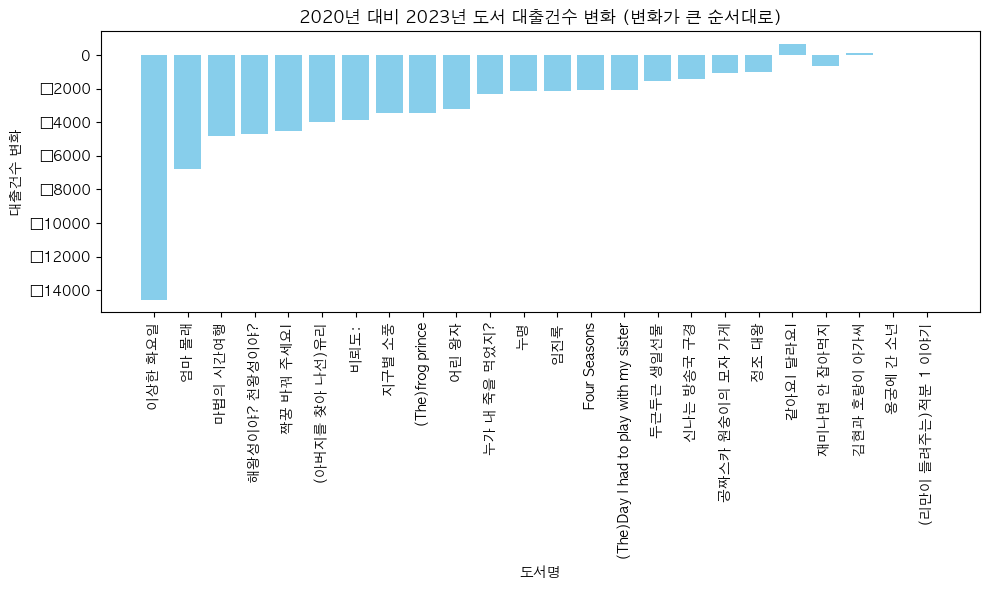

' \n중복제거가 가능한 키값이 제댜로 존재하지 않는다\nISBN으로 중복제거 하기에는 동일한 책인지 확인이 불가능하다\n세트 ISBN을 활용하여 하나의 책으로 간주하여 중복을 제거 하였다.\n그러다보니 "이상한 화요일" 이라는 책이 가장 높은 대출건수를 기록하는데 해당 도서는 비룡소 출판사의 그림동화 시리즈로\n전 84권의 모든 세트 ISBN을 하나의 ISBN으로 묶어서 처리하였다.\n그러다보니 가장 높은 대출건수를 기록하고 있다.\n\n이처럼 전처리가 잘안되는 경우가 많아서 자연어처리 및 단어 유사도 측정을 하려고 했으나 데이터의 양이 기본적으로 20만건 이상이라 많은 시간이 소요되어 포기하였다.\n'

In [43]:
# 위 분석만으로는 중복 및 누락값 처리가 제대로 되지 않음

import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic' 

# CSV 파일 읽기
list_2020 = pd.read_csv('2020_11.csv')
list_2023 = pd.read_csv('2023_11.csv')

# 세트ISBN 있으면 ISBN에 덮어쓰기
list_2020['ISBN'] = list_2020.apply(lambda row: row['세트 ISBN'] if pd.notna(row['세트 ISBN']) else row['ISBN'], axis=1)
list_2023['ISBN'] = list_2023.apply(lambda row: row['세트 ISBN'] if pd.notna(row['세트 ISBN']) else row['ISBN'], axis=1)

# ISBN 기준으로 중복 제거하며 대출건수 합산
grouped_2020 = list_2020.groupby('ISBN').agg({'도서명': 'first', '대출건수': 'sum'}).reset_index()
grouped_2023 = list_2023.groupby('ISBN').agg({'도서명': 'first', '대출건수': 'sum'}).reset_index()

top50_2020 = grouped_2020.nlargest(50, '대출건수')
top50_2023 = grouped_2023.nlargest(50, '대출건수')

# 2020년과 2023년 데이터 병합
merged_books = pd.merge(top50_2020, grouped_2023, on='ISBN', suffixes=('_2020', '_2023'))

print('\n')
display(merged_books[['도서명_2020', '대출건수_2020', '대출건수_2023']])

# 대출건수 증가/감소 파악
merged_books['대출건수 변화'] = merged_books['대출건수_2023'] - merged_books['대출건수_2020']

# '대출건수 변화'의 절대값을 기준으로 데이터 정렬
merged_books['대출건수 변화 절대값'] = merged_books['대출건수 변화'].abs()
merged_books_sorted = merged_books.sort_values(by='대출건수 변화 절대값', ascending=False)

# 그래프로 표현
plt.figure(figsize=(10,6))
plt.bar(merged_books_sorted['도서명_2020'], merged_books_sorted['대출건수 변화'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('도서명')
plt.ylabel('대출건수 변화')
plt.title('2020년 대비 2023년 도서 대출건수 변화 (변화가 큰 순서대로)')
plt.tight_layout()
plt.show()


""" 
중복제거가 가능한 키값이 제댜로 존재하지 않는다
ISBN으로 중복제거 하기에는 동일한 책인지 확인이 불가능하다
세트 ISBN을 활용하여 하나의 책으로 간주하여 중복을 제거 하였다.
그러다보니 "이상한 화요일" 이라는 책이 가장 높은 대출건수를 기록하는데 해당 도서는 비룡소 출판사의 그림동화 시리즈로
전 84권의 모든 세트 ISBN을 하나의 ISBN으로 묶어서 처리하였다.
그러다보니 가장 높은 대출건수를 기록하고 있다.

이처럼 전처리가 잘안되는 경우가 많아서 자연어처리 및 단어 유사도 측정을 하려고 했으나 데이터의 양이 기본적으로 20만건 이상이라 많은 시간이 소요되어 포기하였다.

"""
